### 다항분포 나이브베이즈 모형

연습문제 3

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

from sklearn.metrics import classification_report
print(classification_report(y, model_mult.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



### 감성분석

In [45]:
# 네이버 영화 평은 utf-8로 제작 되어있음. 그래서 codecs로 부름
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   #헤더 제외

In [46]:
# pprint는 pretty print. 어떤 포맷에 맞추어 이쁘게 프린트. 
# 맨 마지막은 점수. 안좋으면 0, 좋으면 1
from pprint import pprint
pprint(data[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [47]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB()),
])

In [49]:
model1.fit(X, y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [50]:
import codecs
with codecs.open("ratings_test.txt", encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]

In [51]:
X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.82     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('mb', MultinomialNB()),
])

In [56]:
model2.fit(X, y)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
from konlpy.tag import Okt
pos_tagger = Okt()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [60]:
model3 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize_pos)),
    ('mb', MultinomialNB()),
])

In [61]:
model3.fit(X, y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_pos at 0x00000186222D1828>,
                                 vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [62]:
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     24827
           1       0.86      0.85      0.85     25173

    accuracy                           0.85     50000
   macro avg       0.85      0.85      0.85     50000
weighted avg       0.85      0.85      0.85     50000



In [63]:
model4 = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1, 2))),
    ('mb', MultinomialNB()),
])

In [64]:
%%time
model4.fit(X, y)

Wall time: 21min 25s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_pos at 0x00000186222D1828>,
                                 use_idf=True, vocabulary=None)),
                ('mb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
print(classification_report(y_test, model4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     24827
           1       0.87      0.86      0.87     25173

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000



연습문제 1

In [26]:
model1.predict(["캡이다"])

array([1])

In [27]:
model1.predict(["감동이다"])

array([1])

In [29]:
model1.predict(["돈 아깝다"])

array([0])

In [30]:
model1.predict(["돈이 안 아깝다"])

array([0])

In [31]:
model1.predict(["짜증난다"])

array([0])

In [32]:
model1.predict(["환상이다"])

array([1])

In [33]:
model1.predict(["오진다"])

array([1])

In [36]:
model1.predict(["지린다"])

array([1])

In [34]:
model1.predict(["굿"])

array([0])

In [35]:
model1.predict(["썩"])

array([0])

### 의사결정나무

In [66]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 0:2]
feature_names = data.feature_names[0:2]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

In [70]:
import io
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

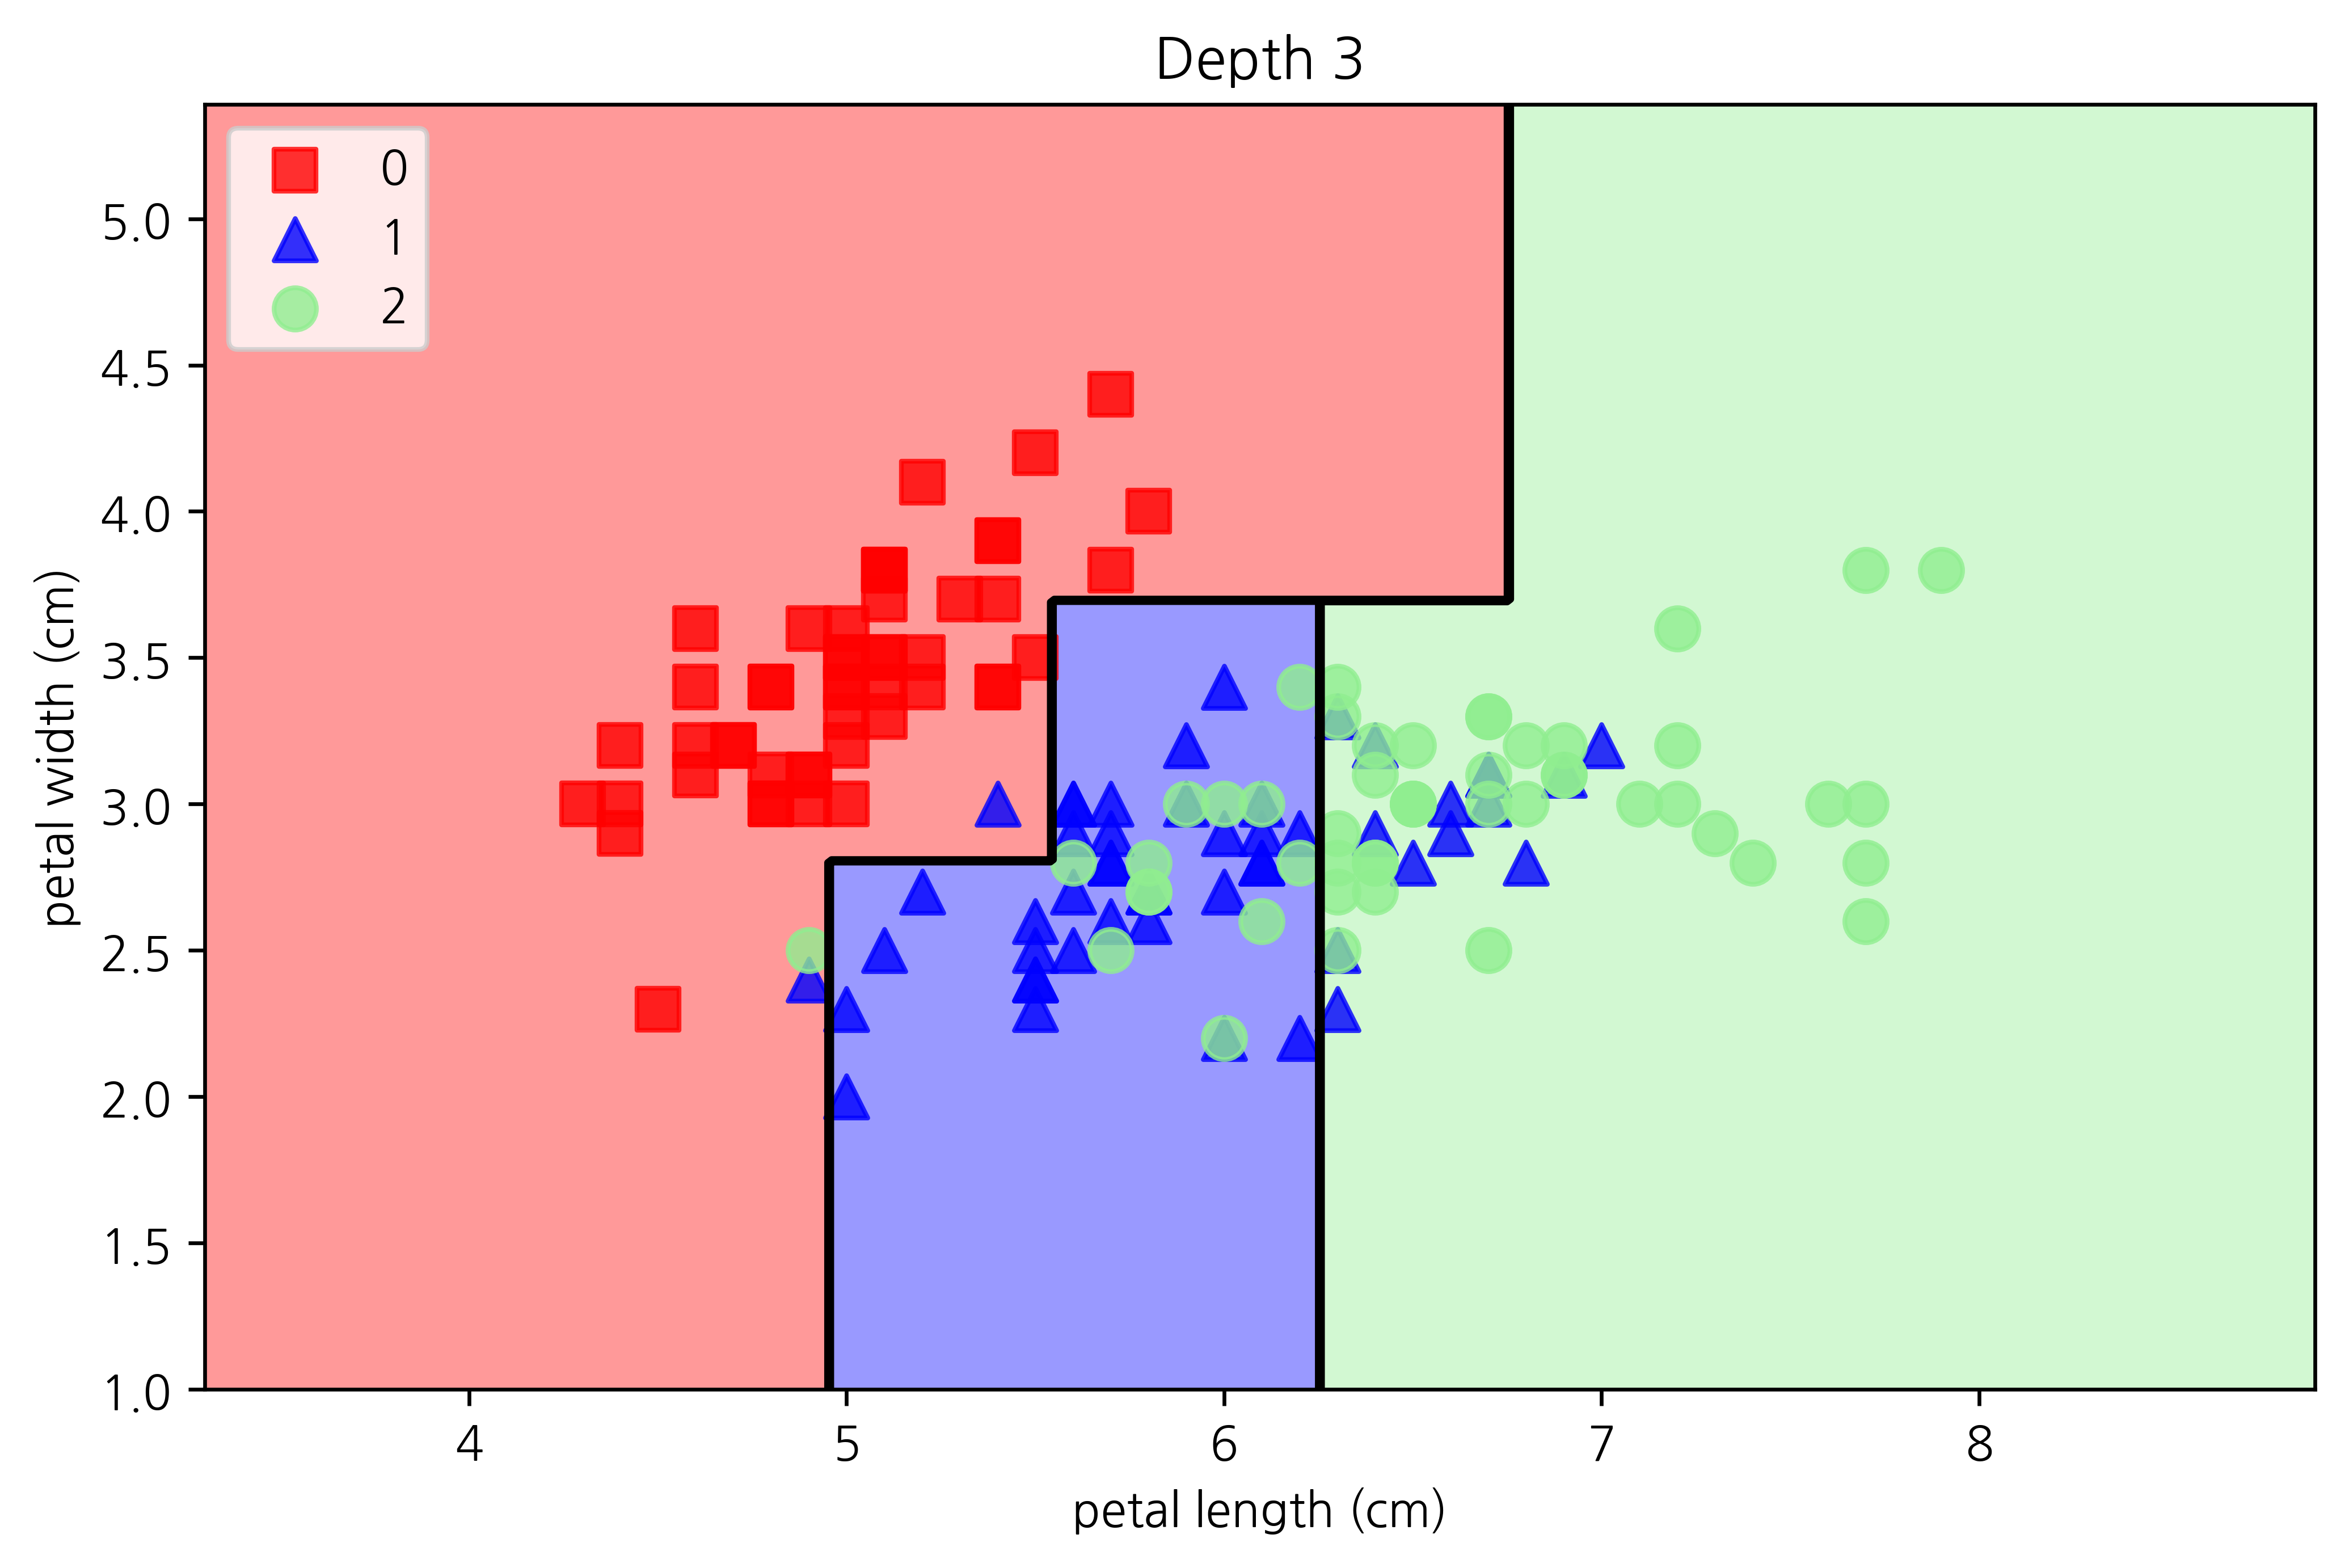

In [71]:
plot_decision_regions(X, y, tree1, "Depth 3")
plt.show()

In [90]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=1, 
                               random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

0.6266666666666666

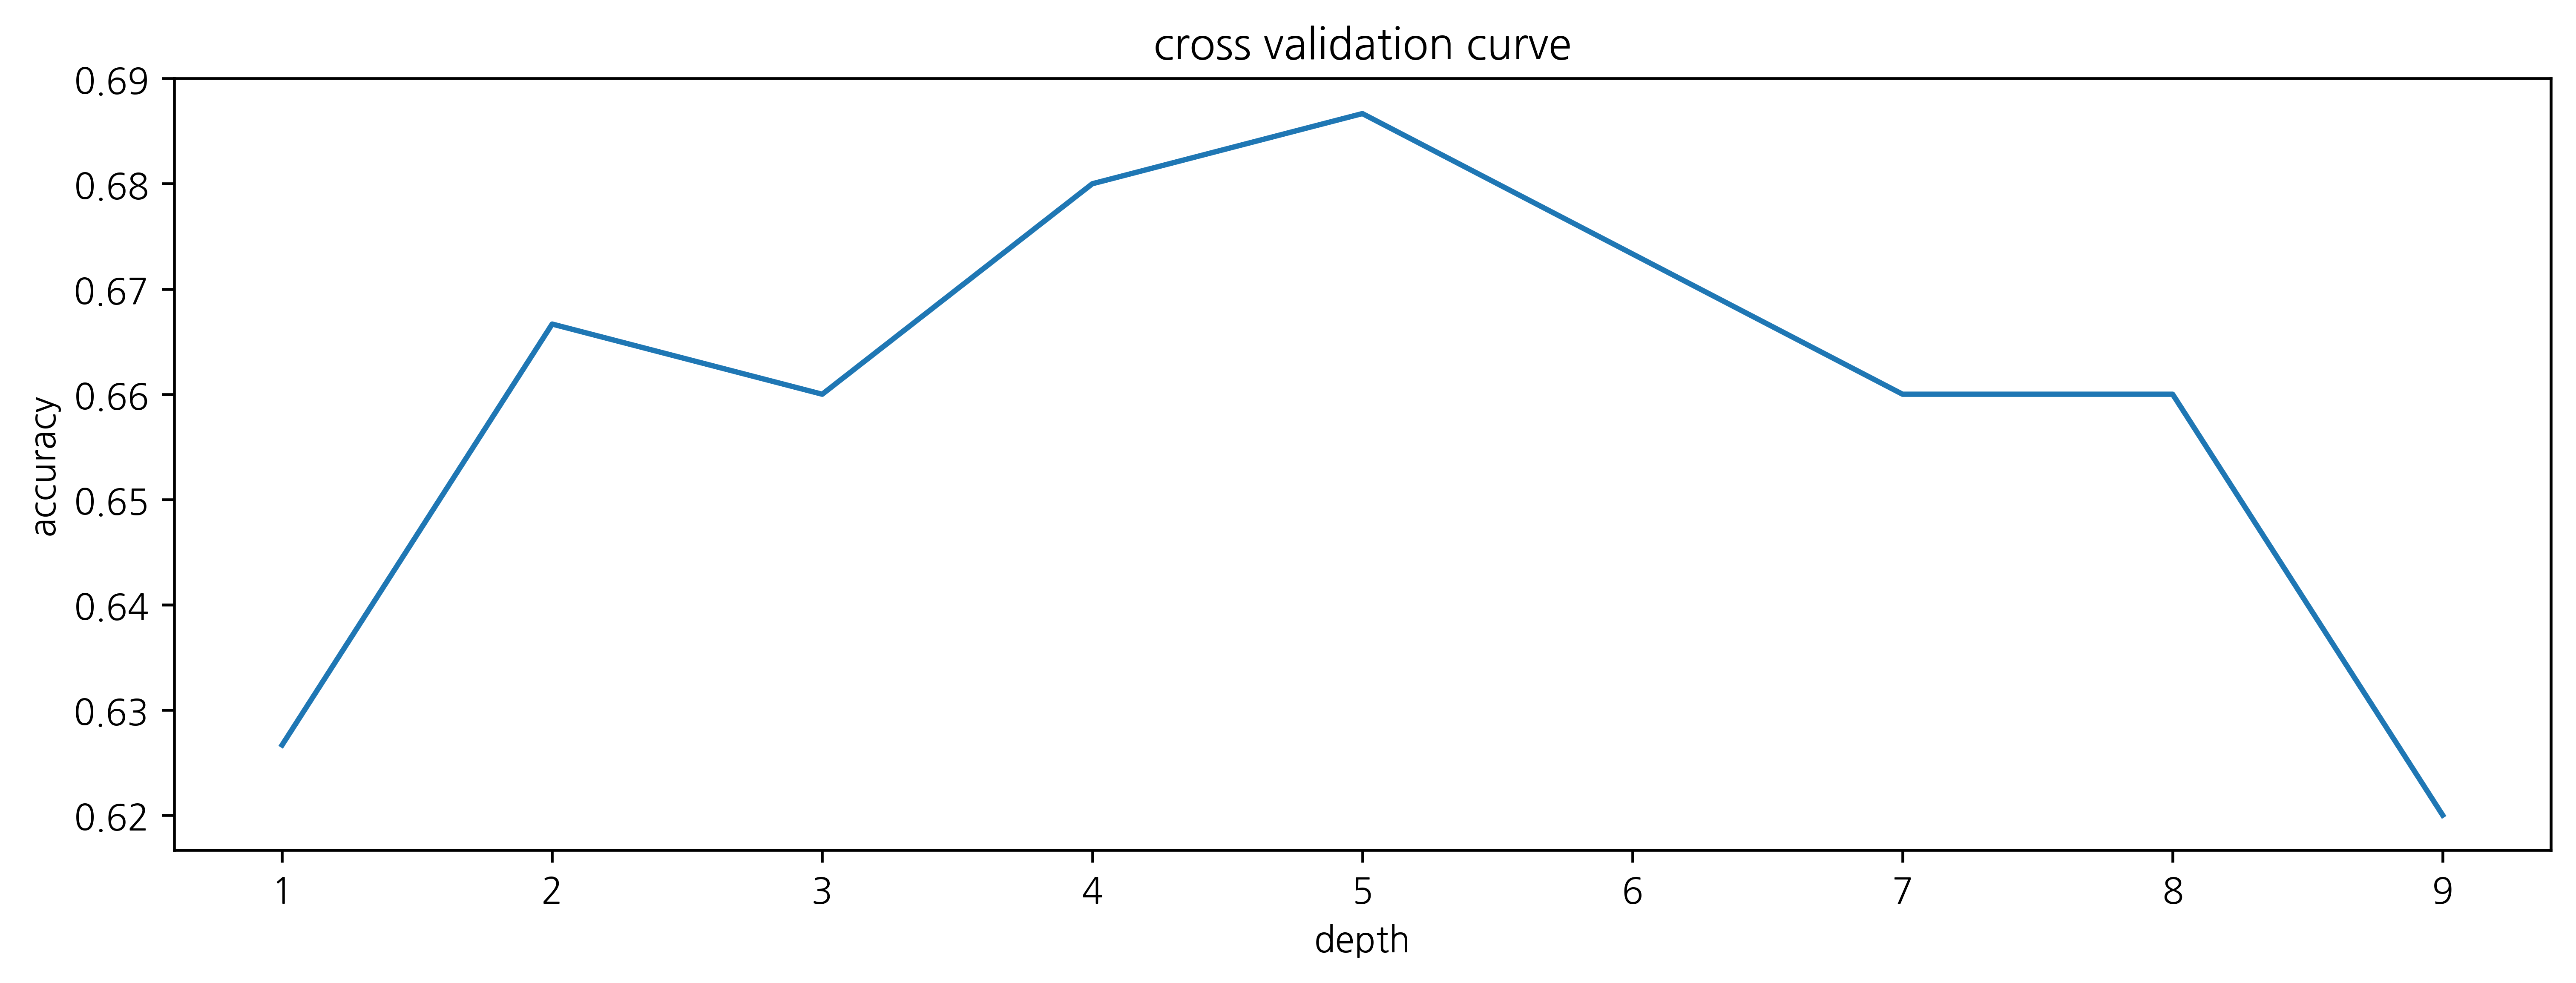

In [95]:
from sklearn.model_selection import KFold, cross_val_score

ls = []
for depth in range(1, 10):
    cv = KFold(5, shuffle=True, random_state=0)
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                   random_state=0)
    ls.append(cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean())
    
plt.figure(figsize = (12, 4))
plt.title("cross validation curve")
plt.plot(np.arange(1, 10), ls)  # x를 1부터 10까지로 설정
plt.ylabel("accuracy")
plt.xlabel("depth")
plt.show()

